In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data as t_data
import torchvision.datasets as datasets
from torchvision import transforms

In [3]:
data_transforms = transforms.Compose([                            
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5],[0.5])
                                      ])
mnist_trainset = datasets.MNIST(root='./data',train=True, download=True,transform=data_transforms)
batch_size = 128
dataloader = t_data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
def make_noise():
  return torch.randn(batch_size, 100)

In [0]:
class generator(nn.Module):

  def __init__(self, inp, out):
    super(generator, self).__init__()
    self.net = nn.Sequential(
        nn.Linear(inp, 256),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(256, 512),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(512, 1024),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(1024, out),
        nn.Tanh()
    )

  def forward(self, x):
    x = self.net(x)
    return x


In [0]:
class discriminator(nn.Module):
  def __init__(self, inp, out):
    super(discriminator, self).__init__()
    self.net = nn.Sequential(
        nn.Linear(inp, 1024),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(1024, 512),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(512, out),
        nn.Sigmoid(),
    )
  def forward(self, x):
    y =  self.net(x)
    return y

In [0]:
def plot_img(array , number = None):
  array = array.detach()
  array = array.reshape(28,28)

  plt.imshow(array, cmap='binary')
  plt.xticks([])
  plt.yticks([])
  if number:
    plt.xlabel(number, fontsize='x-large')

  plt.show()

In [0]:
gen = generator(100, 784)
dis = discriminator(784, 1)

In [0]:
d_steps = 100
g_steps = 100

loss = nn.BCELoss()
optim1 = optim.Adam(dis.parameters(), lr=0.0001)

optim2 = optim.Adam(gen.parameters(), lr=0.0001)

printing_steps = 5
epochs = 50

0


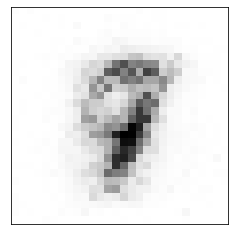

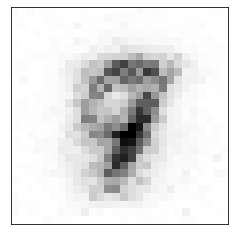

1
2
3
4
5


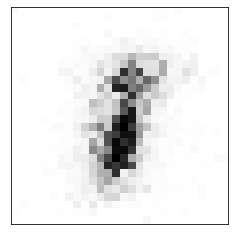

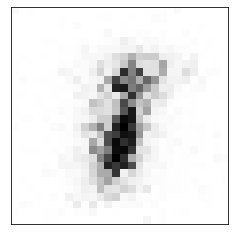

6
7
8
9
10


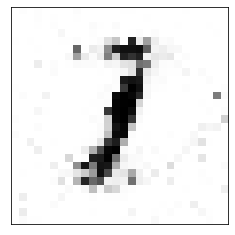

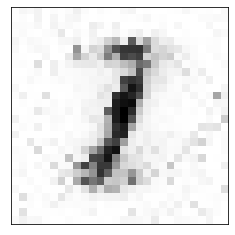

11
12
13
14


KeyboardInterrupt: ignored

In [14]:
for epoch in range(epochs):
  print(epoch)
  # train discriminator
  for d_step in range(d_steps):
    dis.zero_grad()
    for inp_real, _ in dataloader:
      inp_real_x = inp_real
      break
    # train with real sample
    inp_real_x = inp_real_x.reshape(batch_size, 784)
    dis_real_out = dis(inp_real_x)
    dis_real_loss = loss(dis_real_out, Variable(torch.ones(batch_size, 1)))
    dis_real_loss.backward()

    # train with fake data
    inp_fake_x_gen = make_noise()
    dis_inp_fake_x = gen(inp_fake_x_gen).detach()
    dis_fake_out = dis(dis_inp_fake_x)
    dis_fake_loss = loss(dis_fake_out, Variable(torch.zeros(batch_size, 1)))
    dis_fake_loss.backward()
    optim1.step()
    # print("Loss: ", dis_fake_loss.item(), dis_real_loss.item())

  # train generator
  for g_step in range(g_steps):
    gen.zero_grad()
    gen_inp = make_noise()
    gen_out = gen(gen_inp)
    dis_out_gen_training = dis(gen_out)
    gen_loss = loss(dis_out_gen_training, Variable(torch.ones(batch_size, 1)))
    gen_loss.backward()
    optim2.step()

  if epoch%printing_steps == 0:
    plot_img(gen_out[0])
    plot_img(gen_out[1])

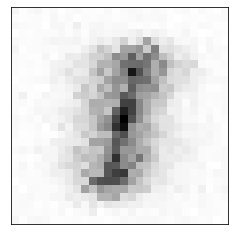

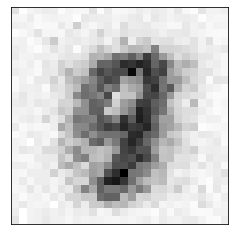

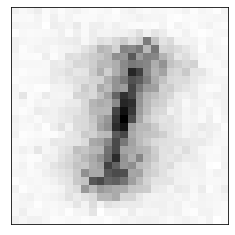

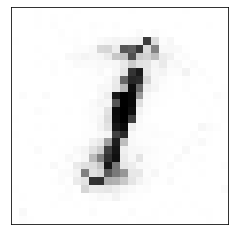

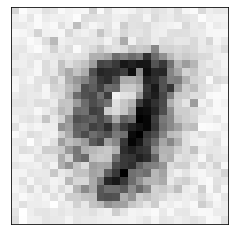

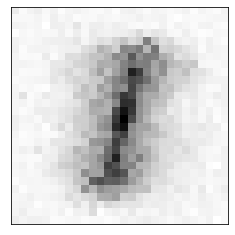

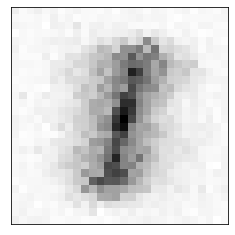

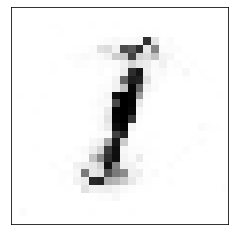

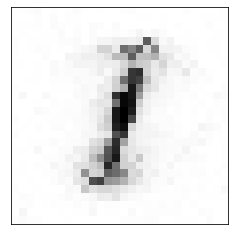

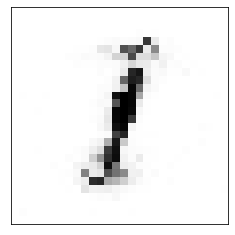

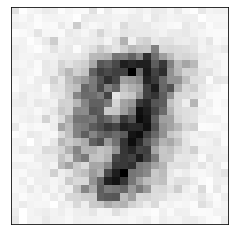

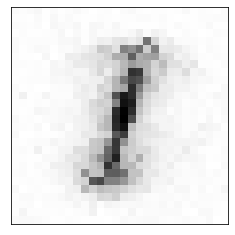

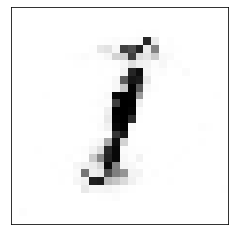

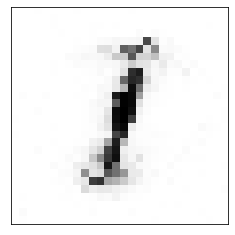

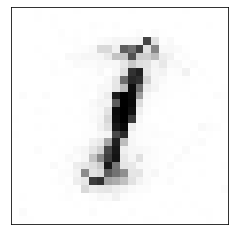

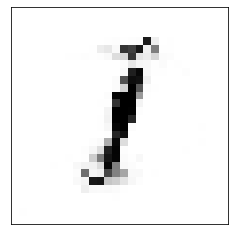

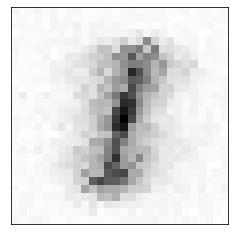

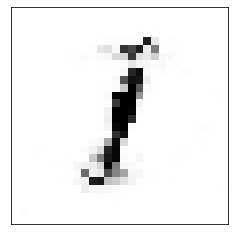

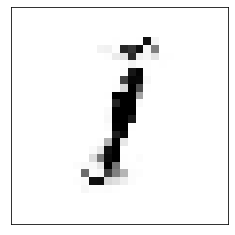

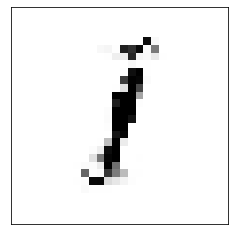

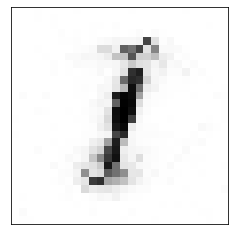

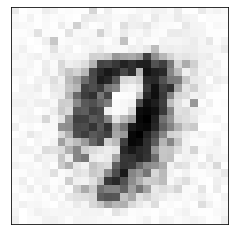

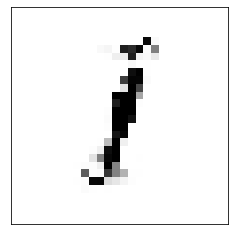

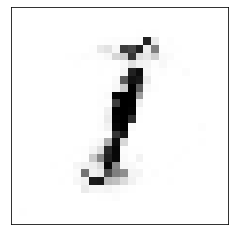

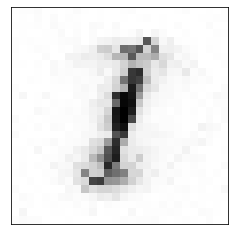

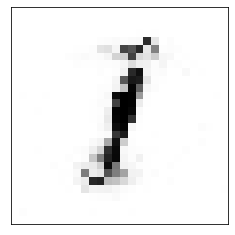

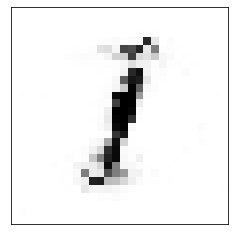

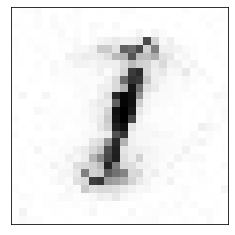

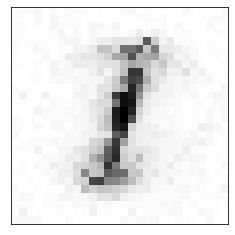

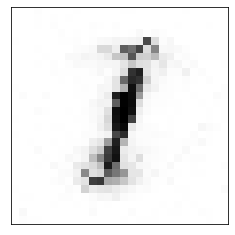

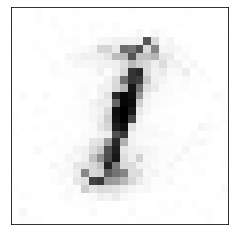

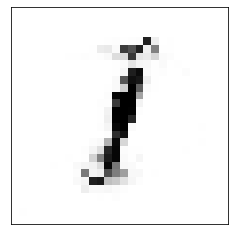

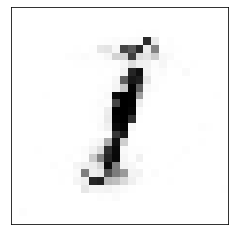

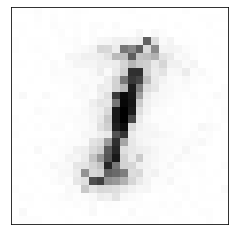

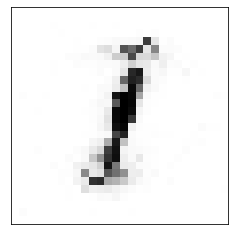

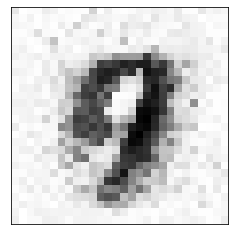

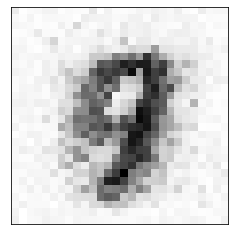

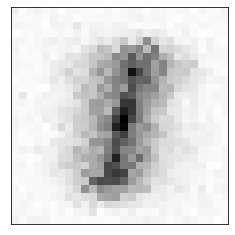

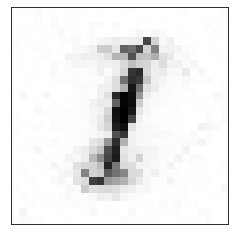

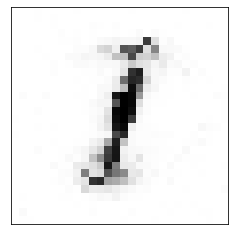

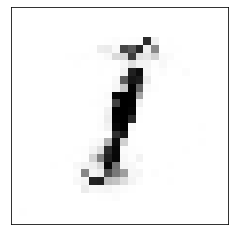

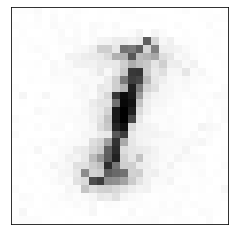

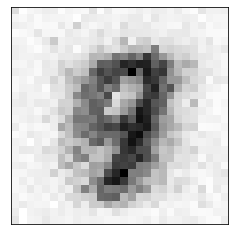

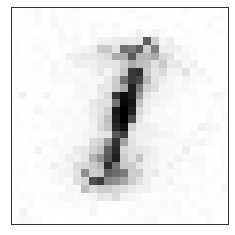

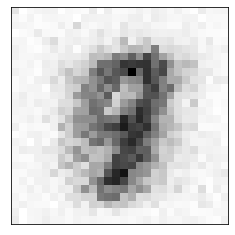

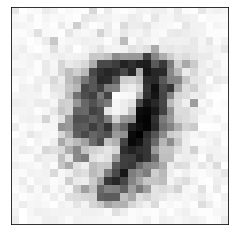

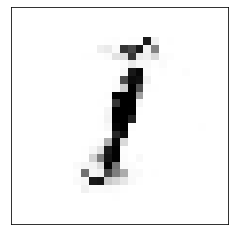

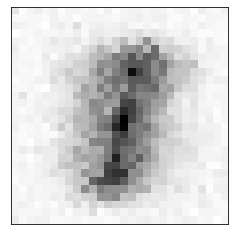

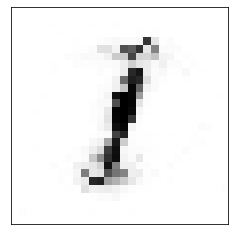

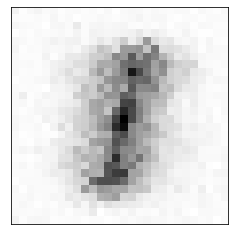

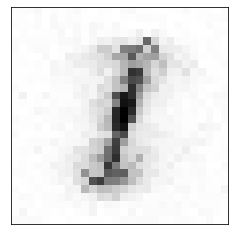

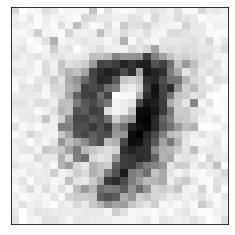

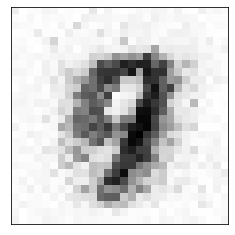

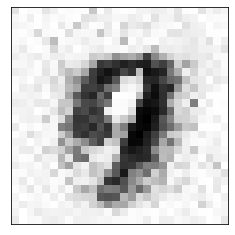

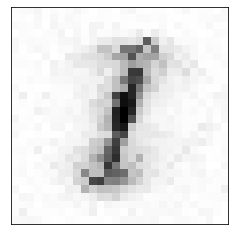

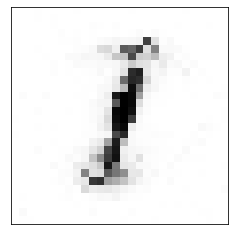

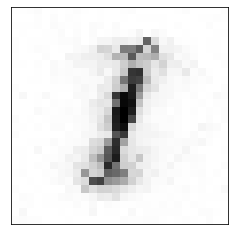

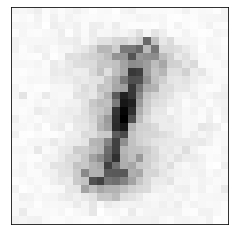

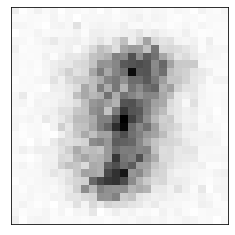

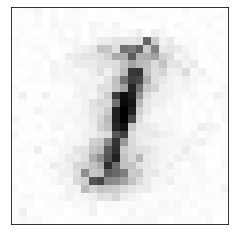

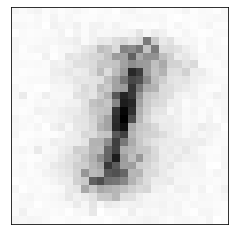

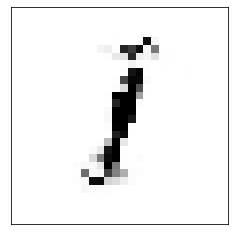

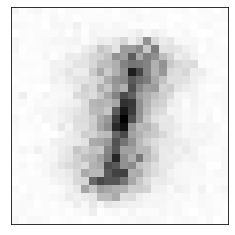

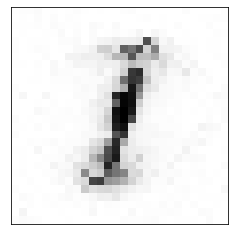

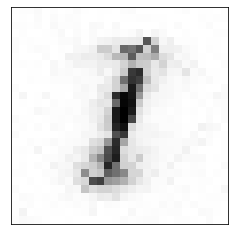

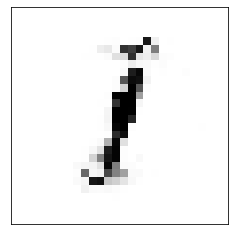

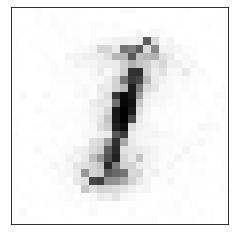

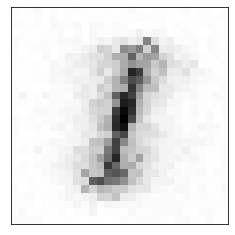

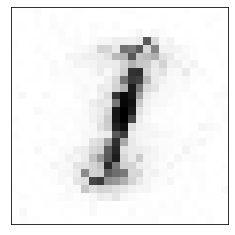

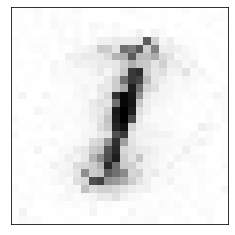

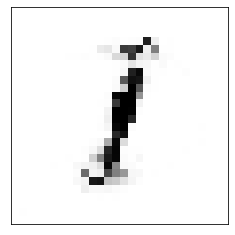

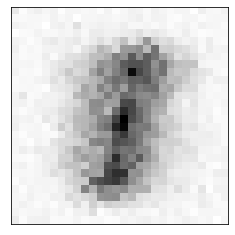

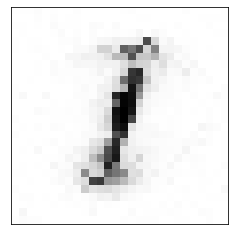

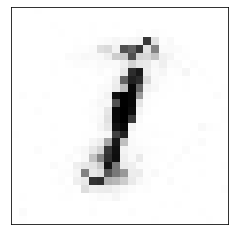

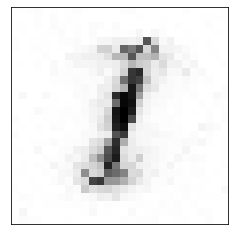

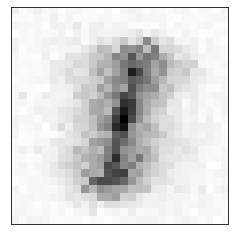

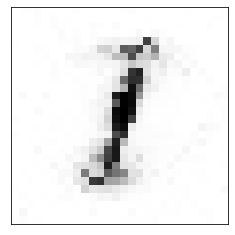

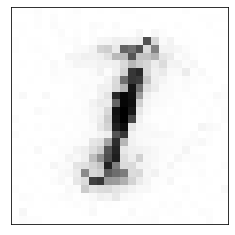

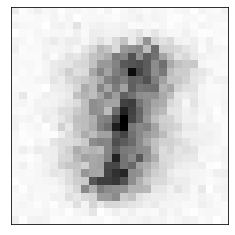

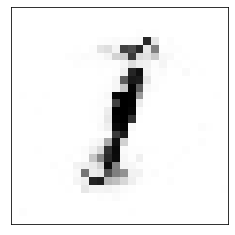

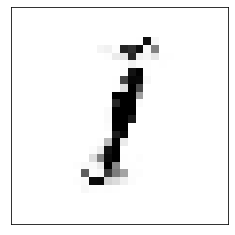

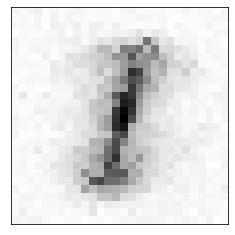

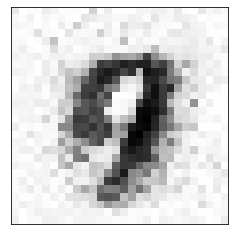

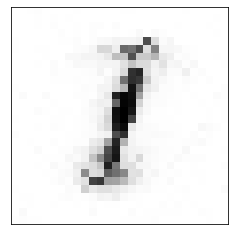

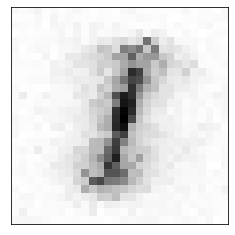

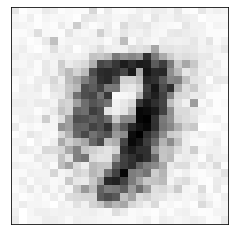

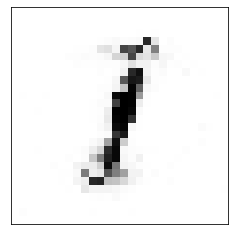

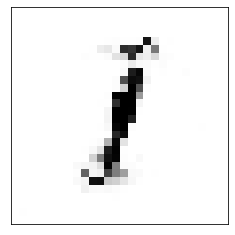

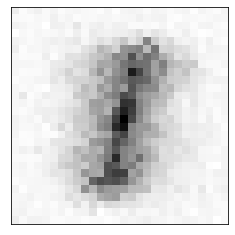

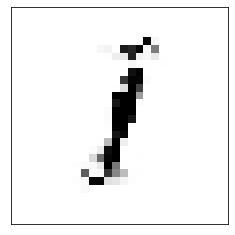

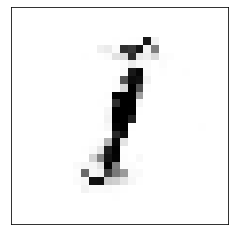

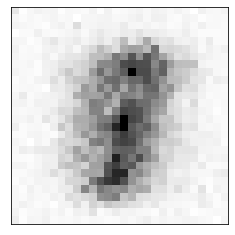

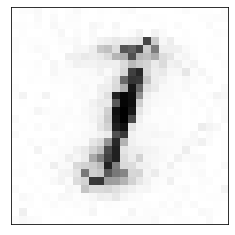

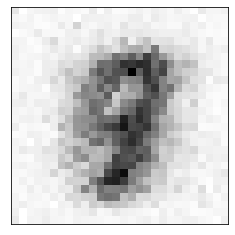

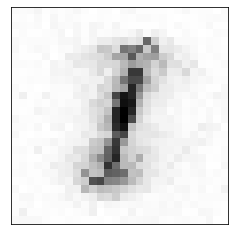

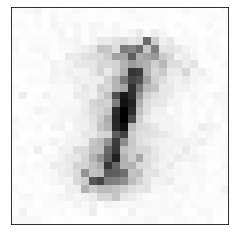

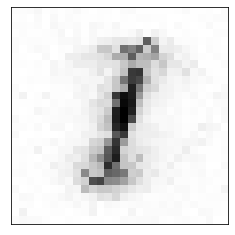

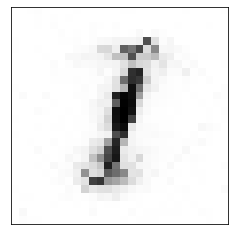

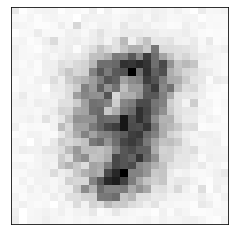

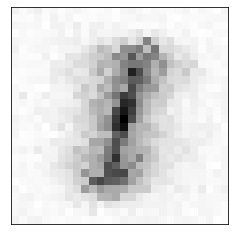

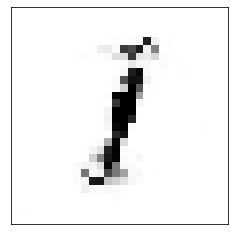

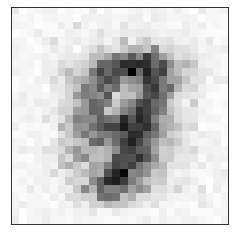

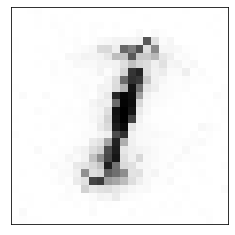

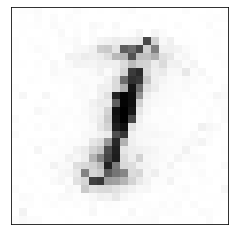

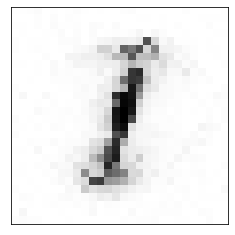

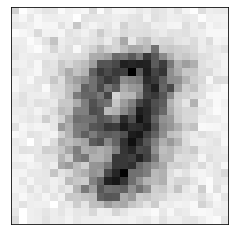

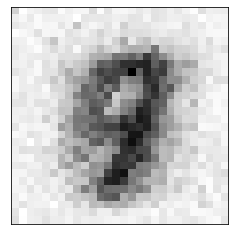

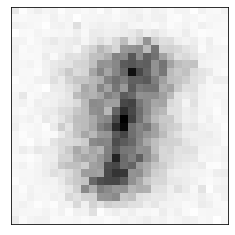

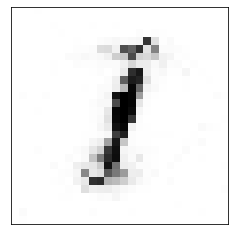

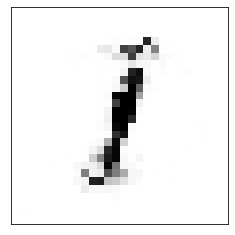

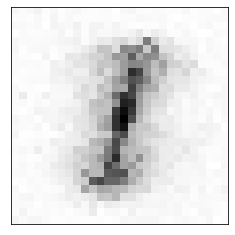

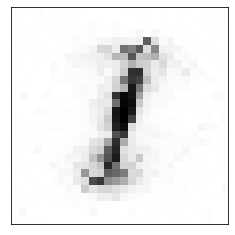

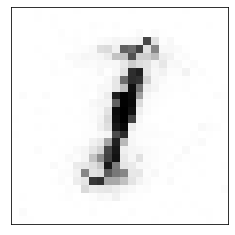

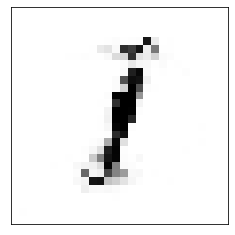

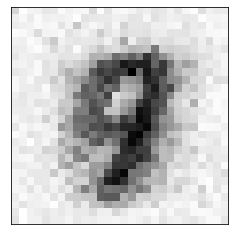

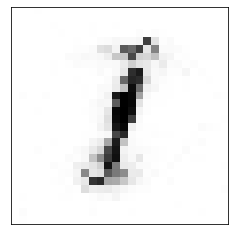

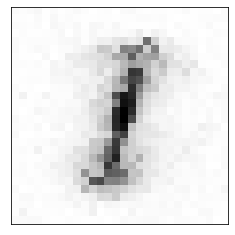

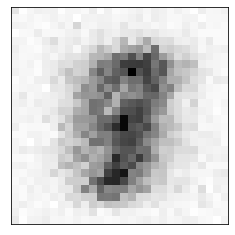

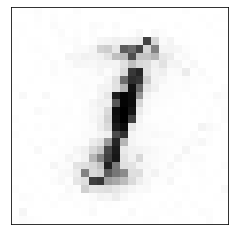

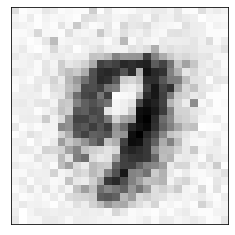

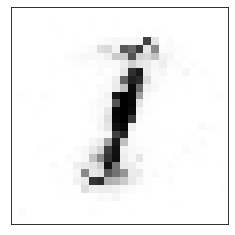

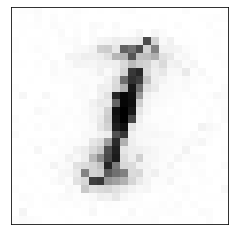

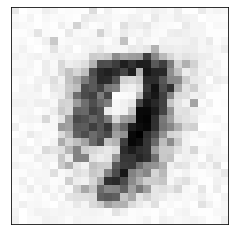

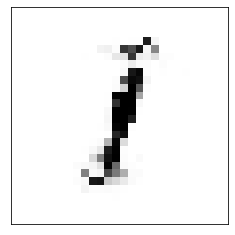

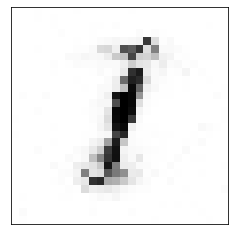

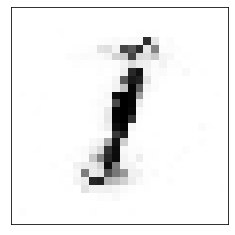

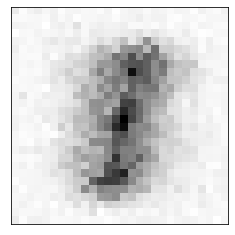

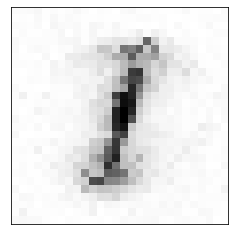

In [34]:
data = make_noise()
for i in range(data.size(0)):
  plot_img(gen(data[i]))